In [1]:
!pip install tensorflow-gpu==2.0.0rc0

  Using cached https://files.pythonhosted.org/packages/c3/fd/1e86bc4837cc9a3a5faf3db9b1854aa04ad35b5f381f9648fbe81a6f94e4/google_pasta-0.1.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/28/6a/8c1f62c37212d9fc441a7e26736df51ce6f0e38455816445471f10da4f0a/Keras_Preprocessing-1.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c0/4e/fd492e91abdc2d2fcb70ef453064d980688762079397f779758e055f6575/Markdown-3.1.1-py2.py3-none-any.whl
  Running setup.py install for absl-py: started
    Running setup.py install for absl-py: finished with status 'done'
  Found existing installation: setuptools 40.8.0
    Uninstalling setuptools-40.8.0:
      Successfully uninstalled setuptools-40.8.0
  Running setup.py install for wrapt: started
    Running setup.py install for wrapt: finished with

You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
X_train = X_train / 255.0

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test = X_test / 255.0

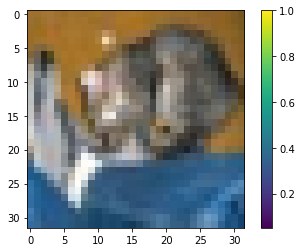

In [8]:
plt.figure()
plt.imshow(X_test[0])
plt.colorbar()

In [9]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

# Building a Convolutional neural network

In [10]:
model = tf.keras.models.Sequential()

# Adding the first CNN Layer
CNN layer hyper-parameters:

* filters: 32
* kernel_size:3
* padding: same
* activation: relu
* input_shape: (32, 32, 3)

In [11]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding="same", activation="relu", input_shape=[32, 32, 3]))

# Adding the second CNN Layer and max pool layer
CNN layer hyper-parameters:

* filters: 32
* kernel_size:3
* padding: same
* activation: relu

MaxPool layer hyper-parameters:

* pool_size: 2
* strides: 2
* padding: valid

In [12]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [13]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

# Adding the third CNN Layer
CNN layer hyper-parameters:

* filters: 64
* kernel_size:3
* padding: same
* activation: relu
* input_shape: (32, 32, 3)

In [14]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

# Adding the fourth CNN Layer and max pool layer
CNN layer hyper-parameters:

* filters: 64
* kernel_size:3
* padding: same
* activation: relu

MaxPool layer hyper-parameters:

* pool_size: 2
* strides: 2
* padding: valid

In [15]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [16]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

# Adding the Flatten layer

In [17]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))

# Adding the first Dense layer
Dense layer hyper-parameters:

* units/neurons: 128
* activation: relu


In [18]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# Adding the second Dense layer (output layer)
Dense layer hyper-parameters:

* units/neurons: 10 (number of classes)
* activation: softmax

In [19]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

# Compiling the model
* sparse_categorical_accuracy
* sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value.

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

# Training the model

In [23]:
model.fit(X_train, y_train, epochs=14 ,batch_size=128)

Train on 50000 samples
Epoch 1/14
50000/50000 [==============================] - 72s 1ms/sample - loss: 1.5561 - sparse_categorical_accuracy: 0.4326
Epoch 2/14
50000/50000 [==============================] - 70s 1ms/sample - loss: 1.1527 - sparse_categorical_accuracy: 0.5887
Epoch 3/14
50000/50000 [==============================] - 75s 1ms/sample - loss: 0.9741 - sparse_categorical_accuracy: 0.6583
Epoch 4/14
50000/50000 [==============================] - 71s 1ms/sample - loss: 0.8464 - sparse_categorical_accuracy: 0.7034
Epoch 5/14
50000/50000 [==============================] - 70s 1ms/sample - loss: 0.7524 - sparse_categorical_accuracy: 0.73702s - loss: 0.7540 - sparse_categorical_accuracy:  - ETA: 1s - loss: 0.7536 - sparse_categorical_accuracy: 0. - ETA: 1s - loss: 0.7526 - sparse_categorical_accuracy: 
Epoch 6/14
50000/50000 [==============================] - 71s 1ms/sample - loss: 0.6848 - sparse_categorical_accuracy: 0.7587
Epoch 7/14
50000/50000 [==============================] 

# Model evaluation and prediction

In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [25]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.78329998254776
